

# **`1.Mount Drive`**

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**`2. Establish Data Path`**

In [2]:
# Set the file path
data_path = '/content/DelayedFlights.csv'


# **`3. Read Data`**

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Machine Learning/DelayedFlights.csv')



# View the first few rows
df.head()


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


# **`4. Feature Engineering`**
`Handle Missing Values`

In [4]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Impute or drop missing values
df = df.dropna()  # Drop rows with missing values


Missing values:
 Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [5]:
# Handling missing values for numerical columns without inplace
df['ActualElapsedTime'] = df['ActualElapsedTime'].fillna(df['ActualElapsedTime'].median())
df['AirTime'] = df['AirTime'].fillna(df['AirTime'].median())
df['ArrTime'] = df['ArrTime'].fillna(df['ArrTime'].median())
df['TaxiIn'] = df['TaxiIn'].fillna(0)
df['TaxiOut'] = df['TaxiOut'].fillna(df['TaxiOut'].median())

# Handling missing values for categorical columns
df['TailNum'] = df['TailNum'].fillna('Unknown_TailNum')

# Handling missing delay columns by filling with 0
delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
df[delay_columns] = df[delay_columns].fillna(0)

# Checking for missing values after imputation
print(df.isnull().sum())


<ipython-input-5-3d9591b9705a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ActualElapsedTime'] = df['ActualElapsedTime'].fillna(df['ActualElapsedTime'].median())
<ipython-input-5-3d9591b9705a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AirTime'] = df['AirTime'].fillna(df['AirTime'].median())
<ipython-input-5-3d9591b9705a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64


`Data Transformation`

In [6]:
#Convert categorical features into numerical using one-hot encoding or label encoding:
#One-hot encoding for categorical features
df = pd.get_dummies(df, drop_first=True)



`Data Normalization`
`Normalize numerical features:`


















In [7]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/drive/My Drive/Machine Learning/DelayedFlights.csv')


# List of numerical columns (based on the data preview)
numerical_columns = ['DepTime', 'ArrTime', 'CRSDepTime', 'CRSArrTime', 'FlightNum',
                     'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay',
                     'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
                     'SecurityDelay', 'LateAircraftDelay']

# Normalize the numerical columns
df[numerical_columns] = (df[numerical_columns] - df[numerical_columns].min()) / \
                        (df[numerical_columns].max() - df[numerical_columns].min())

# View the first few rows of the normalized dataframe
print(df.head())





   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek   DepTime  CRSDepTime  \
0           0  2008      1           3          4  0.834514    0.828741   
1           1  2008      1           3          4  0.313881    0.311573   
2           2  2008      1           3          4  0.261359    0.262823   
3           4  2008      1           3          4  0.761984    0.743959   
4           5  2008      1           3          4  0.808253    0.811785   

    ArrTime  CRSArrTime UniqueCarrier  ...    TaxiIn   TaxiOut  Cancelled  \
0  0.921217    0.927083            WN  ...  0.016667  0.018957          0   
1  0.417257    0.416667            WN  ...  0.020833  0.023697          0   
2  0.334723    0.312500            WN  ...  0.012500  0.040284          0   
3  0.816173    0.802083            WN  ...  0.012500  0.023697          0   
4  0.883702    0.879167            WN  ...  0.016667  0.023697          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0               

In [8]:
print(df.isna().sum())


Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [9]:
df['CRSElapsedTime'] = df['CRSElapsedTime'].fillna(df['CRSElapsedTime'].median())
df['ArrDelay'] = df['ArrDelay'].fillna(df['ArrDelay'].median())
print(df[['CRSElapsedTime', 'ArrDelay']].isna().sum())
print(df.isna().sum())


CRSElapsedTime    0
ArrDelay          0
dtype: int64
Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime            0
AirTime                8387
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


`Feature Imbalance handling `

In [10]:
from sklearn.preprocessing import StandardScaler

# Selecting continuous features to scale
features_to_scale = ['ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut']
scaler = StandardScaler()

# Scaling the features
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


`Multicollinearity Check`

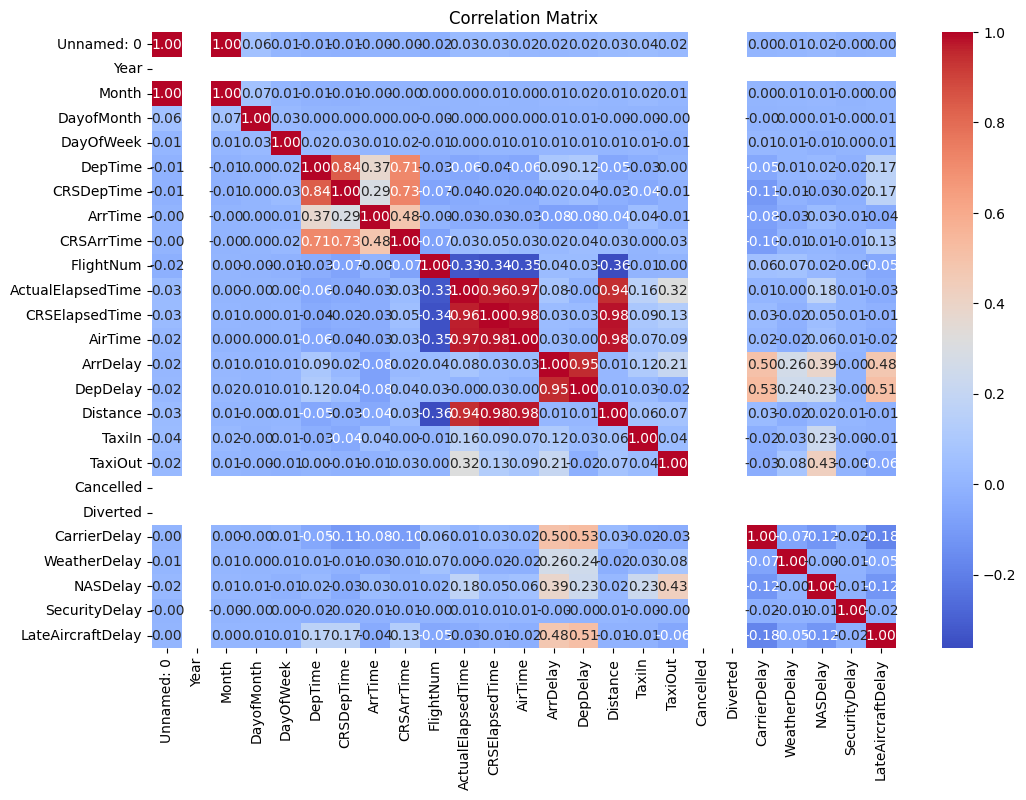

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


              Feature           VIF
0          Unnamed: 0  1.592231e+02
1                Year  0.000000e+00
2               Month  1.589451e+02
3          DayofMonth  1.007741e+00
4           DayOfWeek  1.002439e+00
5             DepTime  3.948494e+00
6          CRSDepTime  4.084346e+00
7             ArrTime  1.393417e+00
8          CRSArrTime  2.711576e+00
9           FlightNum  1.223175e+00
10  ActualElapsedTime           inf
11     CRSElapsedTime  6.032233e+08
12            AirTime           inf
13           DepDelay  4.472125e+08
14           Distance  3.452122e+01
15             TaxiIn           inf
16            TaxiOut           inf
17          Cancelled           NaN
18           Diverted           NaN
19       CarrierDelay  2.365971e+08
20       WeatherDelay  5.763667e+07
21           NASDelay  1.428207e+08
22      SecurityDelay  5.104800e+05
23  LateAircraftDelay  2.206689e+08


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming df is your dataframe

# Step 1: Remove categorical columns (if you don't need them in the correlation matrix)
categorical_columns = df.select_dtypes(include=['object']).columns
df_numerical = df.drop(columns=categorical_columns)

# Step 2: Handle missing values
# Option 1: Drop rows with missing values (if it's acceptable)
df_numerical = df_numerical.dropna()

# Option 2: Fill missing values with the mean (or median, depending on the nature of data)
# df_numerical = df_numerical.fillna(df_numerical.mean())  # Uncomment this to use mean for filling missing values

# Compute the correlation matrix for numerical columns
correlation_matrix = df_numerical.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Step 3: Calculate VIF (Variance Inflation Factor) for each feature
# Drop the target variable column (replace 'ArrDelay' with your target column name)
X = df_numerical.drop('ArrDelay', axis=1)  # Assuming 'ArrDelay' is the target variable
X = add_constant(X)  # Add constant for intercept

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF results
print(vif_data)


In [12]:
import numpy as np
# Check for non-numeric columns and handle them
# Clean the data (removing NaNs, infinite values, etc.)
df_cleaned = df.dropna()  # For example, remove rows with NaN values
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna()  # Handle infinite value

print(df_cleaned.dtypes)

# If there are non-numeric columns, remove or convert them
df_cleaned = df_cleaned.select_dtypes(include=[np.number])  # Keep only numeric columns

# Check for missing values
print(df_cleaned.isnull().sum())

# Drop rows with missing values or fill them with a default value (e.g., 0)
df_cleaned = df_cleaned.dropna()  # Alternatively, use df_cleaned.fillna(0)


Unnamed: 0             int64
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime           float64
ArrTime              float64
CRSArrTime           float64
UniqueCarrier         object
FlightNum            float64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object
Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
D

In [13]:
import numpy as np

# Replace infinite values with NaN and then drop them
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
df_cleaned = df_cleaned.dropna()


In [14]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Define the VIF calculation function
def calculate_vif(df):
    # Add a constant to the dataframe for intercept calculation
    X = add_constant(df)

    # Calculate VIF for each feature
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif_data

# Assuming df_cleaned is your cleaned dataframe
# Remove any non-numeric or unwanted columns if necessary
df_cleaned = df_cleaned.select_dtypes(include=[np.number])

# Recalculate VIF after removing some features
vif_result_cleaned = calculate_vif(df_cleaned)
print(vif_result_cleaned)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


              Feature           VIF
0          Unnamed: 0  1.592232e+02
1                Year  0.000000e+00
2               Month  1.589452e+02
3          DayofMonth  1.007741e+00
4           DayOfWeek  1.002439e+00
5             DepTime  3.948497e+00
6          CRSDepTime  4.084346e+00
7             ArrTime  1.393417e+00
8          CRSArrTime  2.711576e+00
9           FlightNum  1.223173e+00
10  ActualElapsedTime           inf
11     CRSElapsedTime  6.032232e+08
12            AirTime           inf
13           ArrDelay           inf
14           DepDelay  4.472077e+08
15           Distance  3.452121e+01
16             TaxiIn           inf
17            TaxiOut           inf
18          Cancelled           NaN
19           Diverted           NaN
20       CarrierDelay           inf
21       WeatherDelay           inf
22           NASDelay           inf
23      SecurityDelay           inf
24  LateAircraftDelay           inf


In [15]:
# Print the column names to check for discrepancies
print(df_cleaned.columns)

# Drop only the columns that exist in the dataframe
columns_to_drop = ['Unnamed: 0', 'Year', 'Month', 'DepDelay', 'ArrDelay']
columns_to_drop = [col for col in columns_to_drop if col in df_cleaned.columns]

df_cleaned = df_cleaned.drop(columns=columns_to_drop, axis=1)

# Recalculate VIF after removing features
vif_result_cleaned = calculate_vif(df_cleaned)
print(vif_result_cleaned)


Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


              Feature        VIF
0               const   0.000000
1          DayofMonth   1.000900
2           DayOfWeek   1.002366
3             DepTime   3.946724
4          CRSDepTime   4.083049
5             ArrTime   1.392989
6          CRSArrTime   2.711240
7           FlightNum   1.178538
8   ActualElapsedTime        inf
9      CRSElapsedTime  50.148486
10            AirTime        inf
11           Distance  34.489258
12             TaxiIn        inf
13            TaxiOut        inf
14          Cancelled        NaN
15           Diverted        NaN
16       CarrierDelay   1.099743
17       WeatherDelay   1.030907
18           NASDelay   1.450222
19      SecurityDelay   1.001753
20  LateAircraftDelay   1.114952


In [16]:
# Drop one of the highly correlated features
df_reduced = df_cleaned.drop(columns=['DepTime', 'CRSDepTime'])  # or drop 'ArrTime', 'CRSArrTime'
# Recalculate VIF after removing the features
vif_result_reduced = calculate_vif(df_reduced)
print(vif_result_reduced)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


              Feature        VIF
0               const   0.000000
1          DayofMonth   1.000896
2           DayOfWeek   1.001855
3             ArrTime   1.342511
4          CRSArrTime   1.369491
5           FlightNum   1.176709
6   ActualElapsedTime        inf
7      CRSElapsedTime  49.903202
8             AirTime        inf
9            Distance  34.305031
10             TaxiIn        inf
11            TaxiOut        inf
12          Cancelled        NaN
13           Diverted        NaN
14       CarrierDelay   1.080798
15       WeatherDelay   1.028619
16           NASDelay   1.430053
17      SecurityDelay   1.001601
18  LateAircraftDelay   1.096926


`Distribution of predictor `

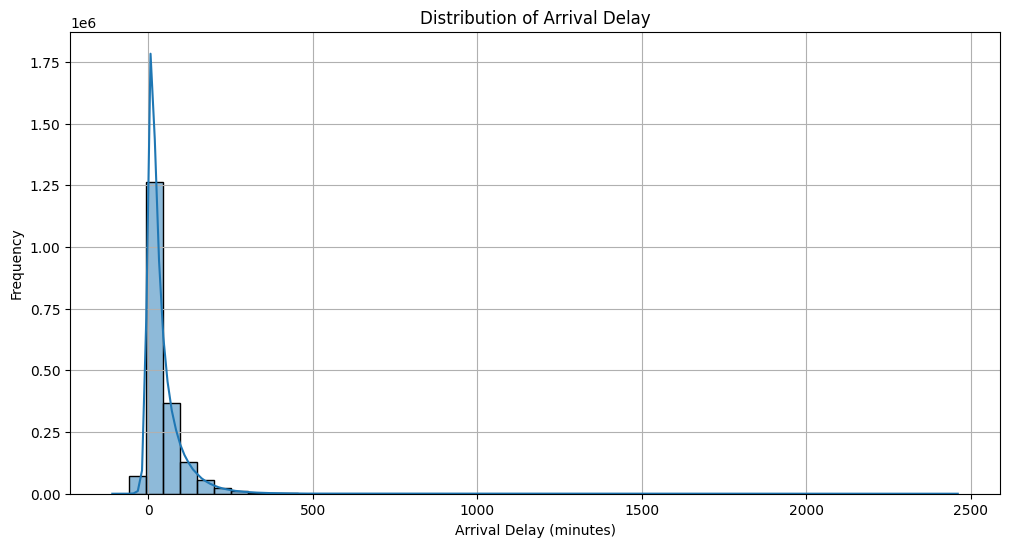

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Machine Learning/DelayedFlights.csv')

# Plotting the distribution of Arrival Delay (ArrDelay)
plt.figure(figsize=(12, 6))
sns.histplot(df['ArrDelay'].dropna(), bins=50, kde=True)  # Drop NaN values if present
plt.title('Distribution of Arrival Delay')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# **`5. Exploratory Data Analysis (EDA)`**

`Visualizations`

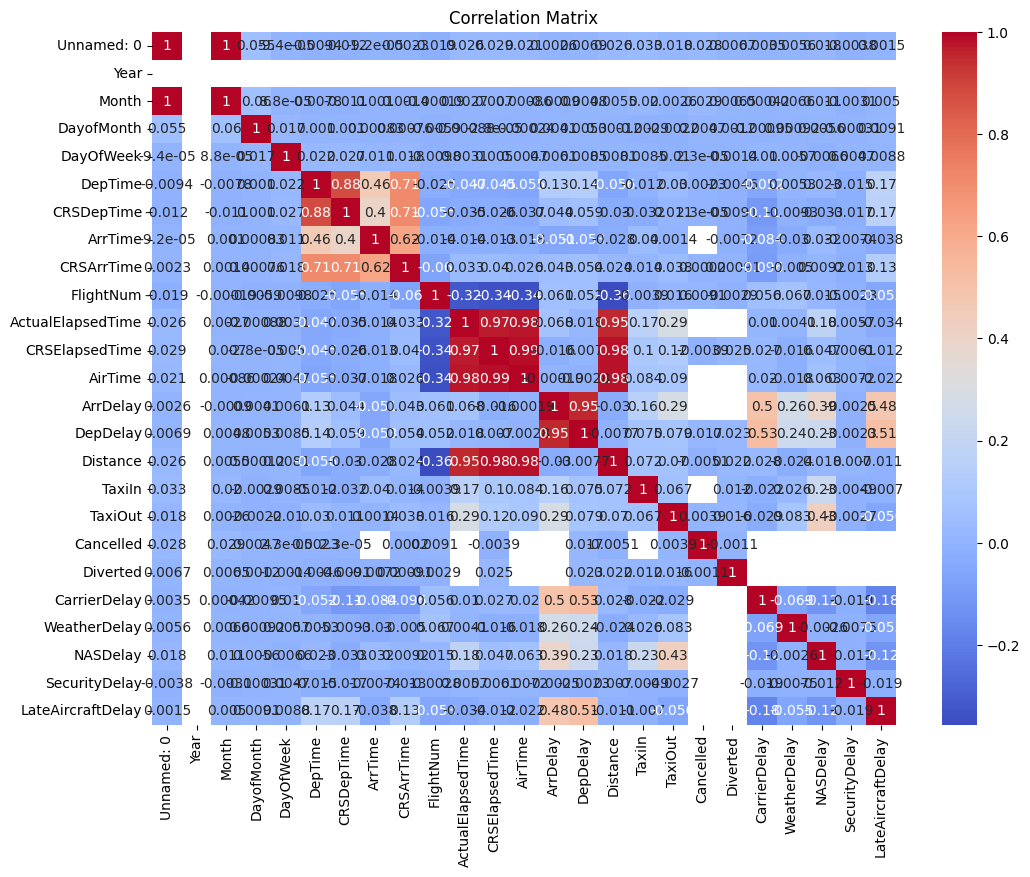

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


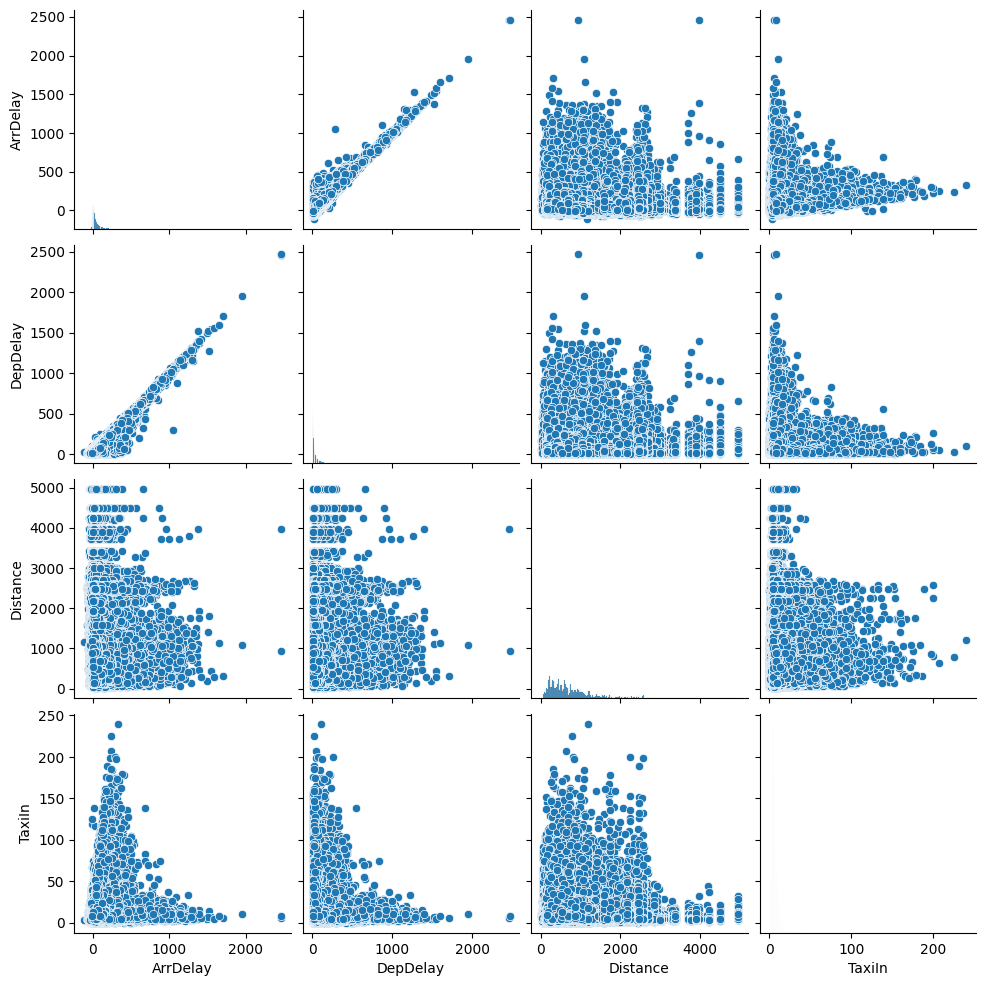

In [19]:
#Pair Plots (Scatter Matrix)
import seaborn as sns
sns.pairplot(df[['ArrDelay', 'DepDelay', 'Distance', 'TaxiIn']])


<Axes: xlabel='Distance', ylabel='ArrDelay'>

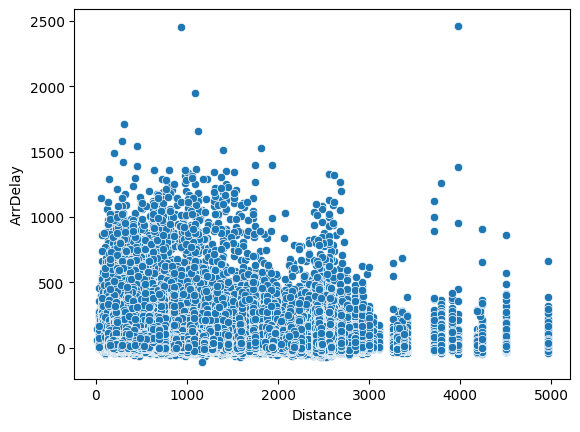

In [20]:
#Feature vs Target (Arrival Delay)
sns.scatterplot(x=df['Distance'], y=df['ArrDelay'])


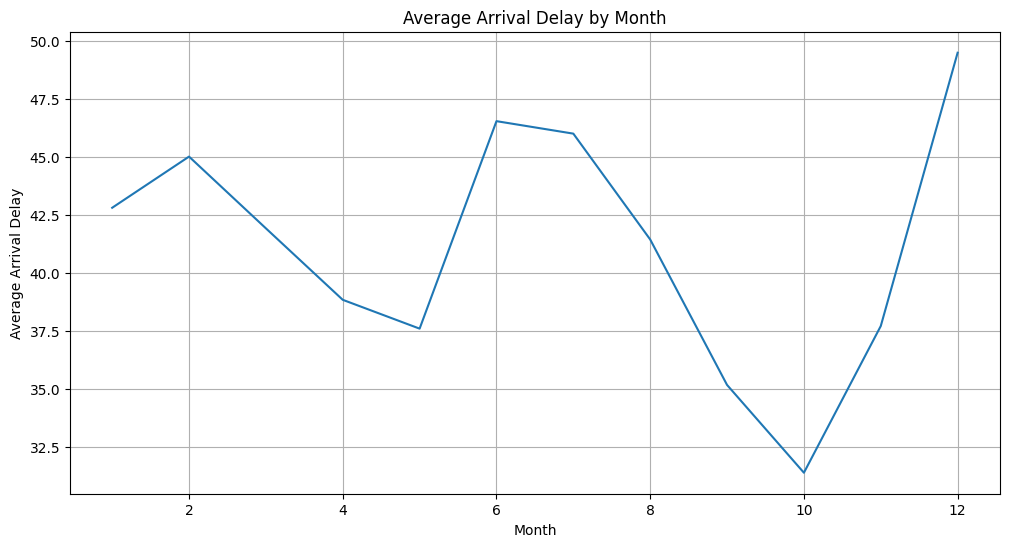

In [21]:
import matplotlib.pyplot as plt

# Plotting the average Arrival Delay by Month
df.groupby('Month')['ArrDelay'].mean().plot(kind='line', figsize=(12,6))
plt.title('Average Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay')
plt.grid(True)
plt.show()


#**`6. Feature Selection and Transformation`**

`Feature Transformation`:
`Apply Principal Component Analysis (PCA):`




In [22]:
print(df.columns)



Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


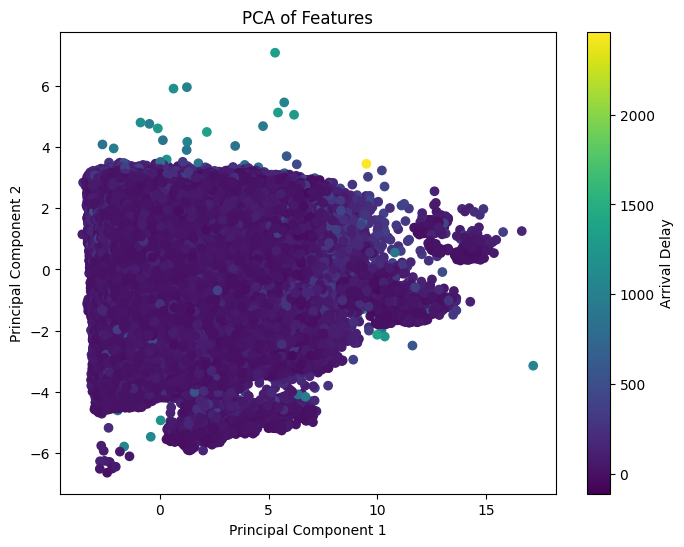

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Step 1: Load your data (assuming it's already loaded into 'df')
# Prepare your data by separating features and target
X = df.drop('ArrDelay', axis=1)  # Assuming 'ArrDelay' is the target column
y = df['ArrDelay']  # Target variable

# Step 2: Handle missing values using SimpleImputer (mean strategy for numeric columns)
numeric_columns = X.select_dtypes(include=['number']).columns
X_numeric = X[numeric_columns]  # Select numeric columns only
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)

# Step 3: Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Now that the data is scaled, you can apply PCA

# Step 4: Apply PCA for dimensionality reduction (reduce to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Visualize the PCA results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')  # Using 'y' as the target for coloring
plt.title('PCA of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Arrival Delay')  # Color bar to represent the target values (e.g., Arrival Delay)
plt.show()


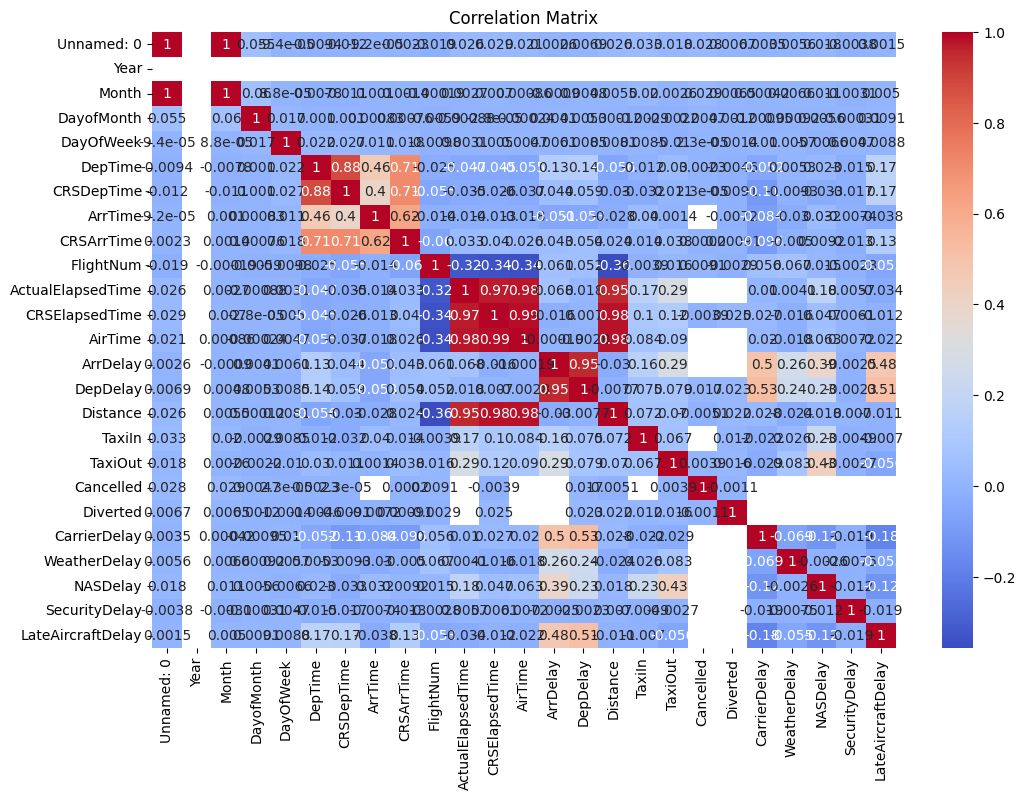

In [24]:
import numpy as np

# Now you can check the correlation matrix including these columns
df_numeric = df.select_dtypes(include=[np.number])
corr_matrix = df_numeric.corr()

# Visualizing the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


`Feature Selection`

In [25]:
print(df.columns)


Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [26]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# Load dataset (Ensure your dataset is correctly loaded)
df = pd.read_csv('/content/drive/My Drive/Machine Learning/DelayedFlights.csv')                          # Uncomment this line if not already done

X = df.drop(columns='ArrDelay')  # Features
y = df['ArrDelay']  # Target variable

# Keep only numeric columns
X = X.select_dtypes(include=['number'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle missing values
X_train = X_train.fillna(X_train.mean())
y_train = y_train.fillna(y_train.mean())

# Apply SelectKBest
selector = SelectKBest(f_regression, k=min(10, X_train.shape[1]))
X_new = selector.fit_transform(X_train, y_train)

# Get selected feature indices and corresponding feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['DepTime', 'FlightNum', 'ActualElapsedTime', 'DepDelay', 'TaxiIn',
       'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'LateAircraftDelay'],
      dtype='object')


#**`7. Data Splitting`**

`Split the dataset into training, validation, and test sets:`

In [27]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=['ArrDelay', 'Unnamed: 0'])  # Replace 'ArrDelay' with your target variable, exclude non-feature columns like 'Unnamed: 0'
y = df['ArrDelay']  # The target variable column

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print out the shapes of the splits
print("Training data:", X_train.shape, y_train.shape)
print("Validation data:", X_val.shape, y_val.shape)
print("Test data:", X_test.shape, y_test.shape)


Training data: (1162054, 28) (1162054,)
Validation data: (387352, 28) (387352,)
Test data: (387352, 28) (387352,)


#**`8. Model Training and Evaluation`**

**`Linear Regression Model`**

In [28]:
# Remove rows where 'ArrDelay' is NaN
df = df.dropna(subset=['ArrDelay'])

# Proceed with splitting again
X = df.drop(columns=['ArrDelay', 'Unnamed: 0'], errors='ignore')
y = df['ArrDelay']


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define features (X) and target (y)
X = df.drop(columns=['ArrDelay', 'Unnamed: 0'])  # Replace 'ArrDelay' with your target variable
y = df['ArrDelay']

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Identify categorical columns (you can adjust based on your dataset)
categorical_columns = X.select_dtypes(include=['object']).columns

# Create a pipeline to preprocess data
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), X.select_dtypes(exclude=['object']).columns),  # Impute missing values in numeric columns
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # Apply one-hot encoding to categorical columns
        ])),
    ('model', LinearRegression())  # Linear regression model
])

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 5.5537992369188696e-05
R-squared: 0.9999999828024659


`Using Support Vector Regression`

In [4]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named 'df' and 'ArrDelay' is the target variable
X = df.drop('ArrDelay', axis=1)  # Drop the target column
y = df['ArrDelay']  # Target column

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, proceed with the smaller sample for SVR
subset_size = 1000
X_train_small = X_train.sample(n=subset_size, random_state=42)
y_train_small = y_train.loc[X_train_small.index]

print(f"Subset shape: {X_train_small.shape}, {y_train_small.shape}")


Subset shape: (1000, 29), (1000,)


In [7]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR

# Step 1: Identify categorical and numeric columns
categorical_columns = X_train_small.select_dtypes(include=['object']).columns
numeric_columns = X_train_small.select_dtypes(include=['number']).columns

# Step 2: Remove rows where y_train_small has NaN values
nan_mask = ~np.isnan(y_train_small)
X_train_small_clean = X_train_small.loc[nan_mask]
y_train_small_clean = y_train_small[nan_mask]

# Step 3: Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_columns)
    ]
)

# Step 4: Build the SVR pipeline with modified StandardScaler
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),  # Disable mean centering for sparse matrix
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.1))
])

# Step 5: Fit the pipeline with the cleaned smaller dataset
pipeline.fit(X_train_small_clean, y_train_small_clean)

# Step 6: Evaluate on the test data
y_pred_small = pipeline.predict(X_test)

print("SVR model trained on smaller subset. Predictions complete.")


SVR model trained on smaller subset. Predictions complete.


Predicted vs Actual:
Predicted: 23.10, Actual: 71.00
Predicted: 23.10, Actual: 548.00
Predicted: 23.10, Actual: 9.00
Predicted: 23.10, Actual: 52.00
Predicted: 23.10, Actual: 22.00
Predicted: 23.10, Actual: 30.00
Predicted: 23.10, Actual: 10.00
Predicted: 23.10, Actual: 22.00
Predicted: 23.10, Actual: 12.00
Predicted: 23.10, Actual: 88.00
Predicted: 23.10, Actual: 200.00
Predicted: 23.10, Actual: 11.00
Predicted: 23.10, Actual: 29.00
Predicted: 23.10, Actual: 37.00
Predicted: 23.10, Actual: 48.00
Predicted: 23.10, Actual: 15.00
Predicted: 23.10, Actual: 22.00
Predicted: 23.10, Actual: 74.00
Predicted: 23.10, Actual: 10.00
Predicted: 23.10, Actual: 28.00


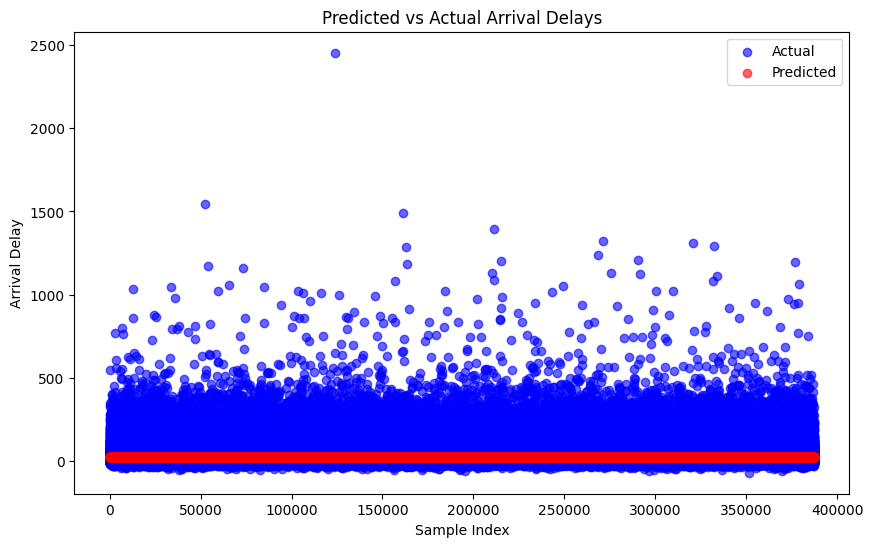

In [8]:
import matplotlib.pyplot as plt

# Step 1: Generate predictions on the test set
y_pred_small = pipeline.predict(X_test)

# Step 2: Display a sample of predictions vs actual values
sample_size = 20  # Display the first 20 results
print("Predicted vs Actual:")
for i in range(sample_size):
    print(f"Predicted: {y_pred_small[i]:.2f}, Actual: {y_test.iloc[i]:.2f}")

# Step 3: Plot predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_pred_small)), y_pred_small, color='red', label='Predicted', alpha=0.6)
plt.title("Predicted vs Actual Arrival Delays")
plt.xlabel("Sample Index")
plt.ylabel("Arrival Delay")
plt.legend()
plt.show()


#**`9. Error Analysis`**

`1. Detect Outliers:`

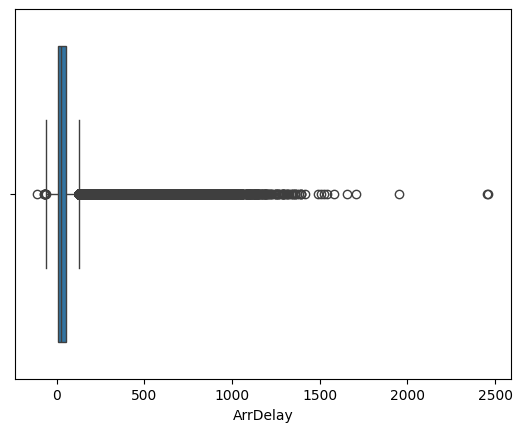

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['ArrDelay'])  # Example for 'ArrDelay' feature
plt.show()


In [10]:
# Dropping rows with missing values (or use an imputation strategy)
df_cleaned = df.dropna()  # Or use df.fillna(value) for imputation

# Or, for specific columns, you can drop NaN values like:
df_cleaned = df[['DepTime', 'ArrTime', 'CarrierDelay', 'WeatherDelay']].dropna()

# You can also fill missing values with the mean (or another strategy):
df['CarrierDelay'].fillna(df['CarrierDelay'].mean(), inplace=True)


<ipython-input-10-5d1e028715e8>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CarrierDelay'].fillna(df['CarrierDelay'].mean(), inplace=True)


`Z-Score: A Z-score tells you how many standard deviations an element is from the mean. A Z-score greater than 3 or less than -3 can be considered as an outlier.`

In [11]:
from scipy.stats import zscore

# Select only numerical columns for Z-score calculation
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores for the numerical columns
z_scores = zscore(df_cleaned[numerical_cols])

# Identify outliers (Z-score > 3 or < -3)
outliers = (z_scores > 3) | (z_scores < -3)

# You can now inspect the outliers:
outliers_df = df_cleaned[outliers.any(axis=1)]


`IQR (Interquartile Range): Calculate the range between the 25th and 75th percentiles. Data points that lie beyond 1.5 times the IQR can be considered outliers.`

In [12]:
Q1 = df['ArrDelay'].quantile(0.25)
Q3 = df['ArrDelay'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['ArrDelay'] < lower_bound) | (df['ArrDelay'] > upper_bound)]
print(outliers)


         Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
33               49  2008      1           3          4   2245.0        1730   
67              105  2008      1           3          4   2241.0        1910   
93              135  2008      1           3          4   2255.0        1820   
197             273  2008      1           3          4   2021.0        1700   
199             276  2008      1           3          4   2301.0        2105   
...             ...   ...    ...         ...        ...      ...         ...   
1936708     7009454  2008     12          13          6   1259.0        1123   
1936711     7009468  2008     12          13          6   1456.0        1122   
1936712     7009469  2008     12          13          6   1645.0        1255   
1936716     7009494  2008     12          13          6   1257.0        1105   
1936717     7009497  2008     12          13          6   1515.0        1302   

         ArrTime  CRSArrTime UniqueCarr

`2. Sample Influence Assessment`

` Influence Function`

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Ensure your dataset is loaded properly


# Example with correct feature selection
X = df.drop(columns='ArrDelay')
y = df['ArrDelay']

# Convert to numeric if needed
X = X.select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle missing values and ensure correct types
X_train = X_train.fillna(X_train.mean()).astype(float)
y_train = y_train.fillna(y_train.mean()).astype(float)

# Add constant term for intercept
X = sm.add_constant(X_train)

# Fit the OLS model
model = sm.OLS(y_train, X).fit()

# Display summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               ArrDelay   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 3.725e+06
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:42:52   Log-Likelihood:            -4.5750e+06
No. Observations:             1355730   AIC:                         9.150e+06
Df Residuals:                 1355706   BIC:                         9.150e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Unnamed: 0        -1.043e-06   3.62e-0

#**`10.Bias and Fairness Assessment`**

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error



# Step 2: Define the target variable and features
target_column = 'ArrDelay'
X = df.drop(columns=[target_column])
y = df[target_column]

# Step 3: Handle missing values in the target variable
X = X[y.notna()]  # Keep rows where target is not NaN
y = y.dropna()     # Drop NaN values in the target

# Step 4: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Limit the training set to 1,000 samples
X_train = X_train[:1000]
y_train = y_train.iloc[:1000]

# Step 6: Define numeric and categorical columns
numeric_columns = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()

# Step 7: Build a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('imputer', SimpleImputer(strategy='mean')),
                          ('scaler', StandardScaler())]), numeric_columns),
        ('cat', Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                          ('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_columns)
    ]
)

# Step 8: Define the pipeline with SVR
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVR(kernel='rbf', C=10))
])

# Step 9: Train the pipeline on 1,000 samples
pipeline.fit(X_train, y_train)

# Step 10: Predict on the test set
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse}")

# Step 11: Bias and fairness assessment
sensitive_column = 'UniqueCarrier'
performance_metrics = {}

# Iterate over each subgroup in the sensitive column
for subgroup in X_test[sensitive_column].unique():
    X_subgroup = X_test[X_test[sensitive_column] == subgroup]
    y_subgroup = y_test[X_subgroup.index]

    # Predict for the subgroup
    y_pred_subgroup = pipeline.predict(X_subgroup)

    # Calculate performance metrics for the subgroup
    mse_subgroup = mean_squared_error(y_subgroup, y_pred_subgroup)
    performance_metrics[subgroup] = mse_subgroup

# Display fairness results
print("\nBias and Fairness Assessment:")
for subgroup, mse in performance_metrics.items():
    print(f"Subgroup {subgroup}: MSE = {mse}")


Mean Squared Error on Test Data: 1201.7988267895528

Bias and Fairness Assessment:
Subgroup WN: MSE = 429.4982024577621
Subgroup AA: MSE = 1687.9693424725167
Subgroup EV: MSE = 1217.139770923777
Subgroup OO: MSE = 836.9541318894146
Subgroup MQ: MSE = 1803.398418275042
Subgroup YV: MSE = 1238.4318388851452
Subgroup CO: MSE = 1367.1013213923088
Subgroup NW: MSE = 3514.303578730321
Subgroup XE: MSE = 1201.3586194282498
Subgroup B6: MSE = 2067.3512758349357
Subgroup FL: MSE = 866.8057738398834
Subgroup UA: MSE = 1197.706163976681
Subgroup US: MSE = 742.6721395902098
Subgroup OH: MSE = 1275.7865587905947
Subgroup HA: MSE = 3174.4683651635546
Subgroup DL: MSE = 1046.4075521485809
Subgroup AS: MSE = 935.3499044306826
Subgroup 9E: MSE = 1336.1346642155152
Subgroup F9: MSE = 629.6635341832124
Subgroup AQ: MSE = 863.7983013595968


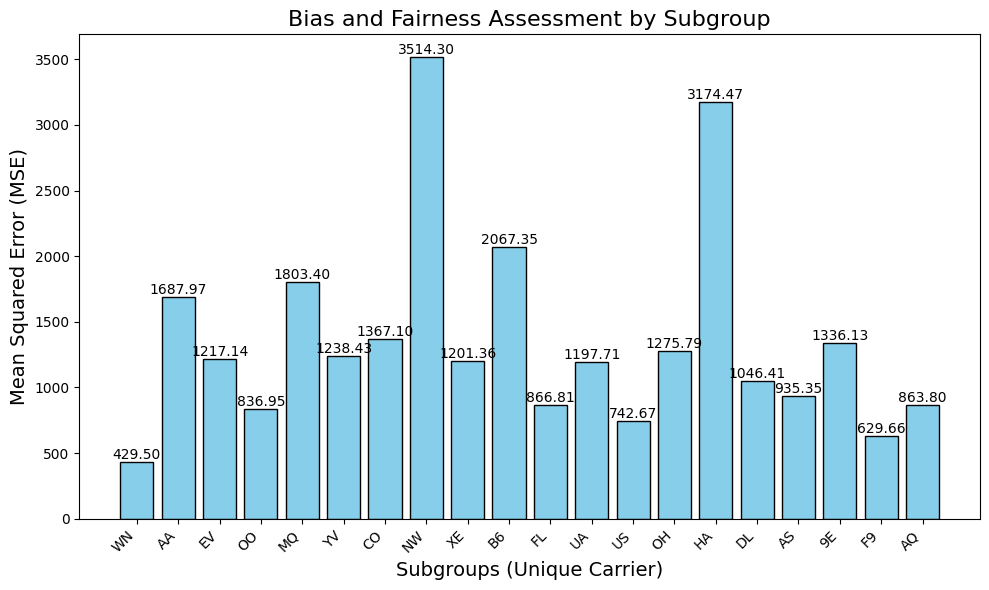

In [15]:
import matplotlib.pyplot as plt

# Visualization of Bias and Fairness Assessment
def plot_fairness_metrics(performance_metrics):
    subgroups = list(performance_metrics.keys())
    mse_values = list(performance_metrics.values())

    plt.figure(figsize=(10, 6))
    bars = plt.bar(subgroups, mse_values, color='skyblue', edgecolor='black')
    plt.xlabel('Subgroups (Unique Carrier)', fontsize=14)
    plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
    plt.title('Bias and Fairness Assessment by Subgroup', fontsize=16)
    plt.xticks(rotation=45, ha='right')

    # Annotate bars with MSE values
    for bar, mse in zip(bars, mse_values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.01,
                 f'{mse:.2f}', ha='center', va='bottom', fontsize=10, color='black')

    plt.tight_layout()
    plt.show()

# Call the visualization function
plot_fairness_metrics(performance_metrics)
